In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Tree diagram of the models
from sklearn import tree
import graphviz

# Permutation Importance of the features
# from sklearn. import PermutationImportance

In [2]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
cat_cols = ['Sex', 'Embarked']

num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

cols = cat_cols + num_cols

X = data[cols]
X.head()

,Sex,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
0,male,S,0,3,22.0,1,0,7.2500
1,female,C,1,1,38.0,1,0,71.2833
2,female,S,1,3,26.0,0,0,7.9250
3,female,S,1,1,35.0,1,0,53.1000
4,male,S,0,3,35.0,0,0,8.0500


In [6]:
X.isnull().sum()

Sex           0
Embarked      2
Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [7]:
sub_X = X[num_cols]
sub_X.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [8]:
imputer = SimpleImputer(strategy='median')
imp_X = pd.DataFrame(imputer.fit_transform(X[num_cols]))
imp_X.columns = sub_X.columns

imp_X.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [9]:
new_X = imp_X.join(X[cat_cols])
new_X.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0.0,3.0,22.0,1.0,0.0,7.2500,male,S
1,1.0,1.0,38.0,1.0,0.0,71.2833,female,C
2,1.0,3.0,26.0,0.0,0.0,7.9250,female,S
3,1.0,1.0,35.0,1.0,0.0,53.1000,female,S
4,0.0,3.0,35.0,0.0,0.0,8.0500,male,S


In [10]:
new_X.dropna(inplace=True)
new_X.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Embarked    0
dtype: int64

In [11]:
encoder = LabelEncoder()

In [12]:
new_X = new_X.join(new_X[cat_cols].apply(encoder.fit_transform).add_suffix('_label'))
new_X.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Sex_label,Embarked_label
0,0.0,3.0,22.0,1.0,0.0,7.2500,male,S,1,2
1,1.0,1.0,38.0,1.0,0.0,71.2833,female,C,0,0
2,1.0,3.0,26.0,0.0,0.0,7.9250,female,S,0,2
3,1.0,1.0,35.0,1.0,0.0,53.1000,female,S,0,2
4,0.0,3.0,35.0,0.0,0.0,8.0500,male,S,1,2


In [13]:
X  = new_X.drop(cat_cols, axis=1)
X.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_label,Embarked_label
0,0.0,3.0,22.0,1.0,0.0,7.2500,1,2
1,1.0,1.0,38.0,1.0,0.0,71.2833,0,0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0,2
3,1.0,1.0,35.0,1.0,0.0,53.1000,0,2
4,0.0,3.0,35.0,0.0,0.0,8.0500,1,2


In [14]:
y = X.Survived

In [15]:
features = X.columns.drop('Survived')

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X[features], y, test_size=0.2, random_state=23)

In [24]:
model_dt = DecisionTreeClassifier(random_state=3, max_depth=5, min_samples_split=5)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=3)

In [25]:
from sklearn import metrics

In [26]:
preds_dt = model_dt.predict(X_valid)
score = metrics.roc_auc_score(preds_dt, y_valid)
print('DecisionTree AUC score: ')
score

DecisionTree AUC score: 


0.7908558772346148

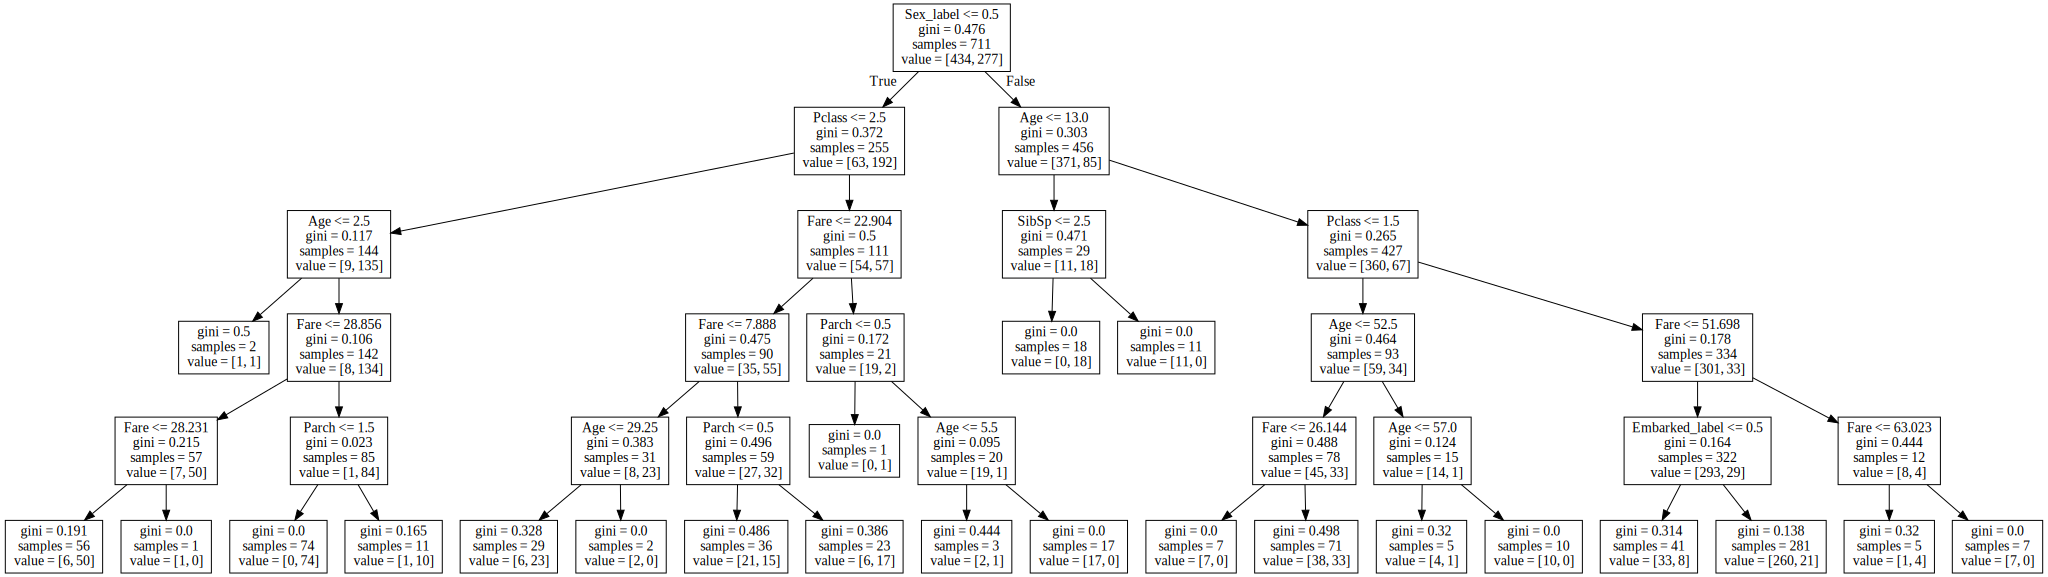

In [27]:
tree_graph = tree.export_graphviz(model_dt, out_file=None, feature_names=features)

graphviz.Source(tree_graph)

In [31]:
import matplotlib.pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [32]:
pdp_goals = pdp.pdp_isolate(model=model_dt, dataset=X_valid, model_features=features, feature='Pclass')

<function matplotlib.pyplot.show(close=None, block=None)>

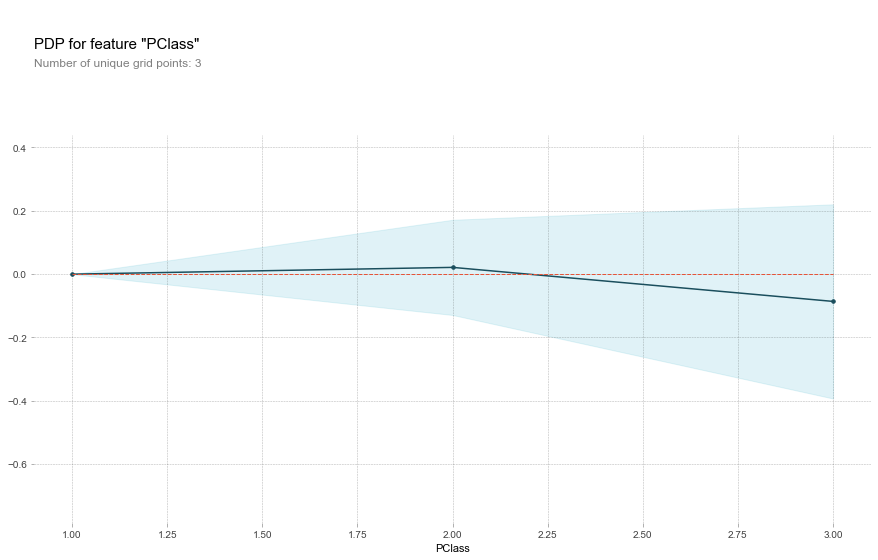

In [33]:
pdp.pdp_plot(pdp_goals, 'PClass')
plt.show